# Correlation Analysis and Visualisation of Various Weather Variables

In [1]:
#Open file and add each line to a list
def fileRead(file):
    list=[]
    with open(file) as file_object:
        content = file_object.readlines()
        for x in content:
            x=x.strip()
            x=x.split(',')
            list.append(x)
    return(list) 


In [2]:
#Convert List to DataFrame
import pandas as pd
import re

def convert_to_DataFrame(list):
    header=list[0]
    list_without_header = list[1:]

    clean_header = []
    for i in header:
        clean_header += re.findall('"([^"]*)"', i)   

    df = pd.DataFrame(list_without_header, columns=clean_header)

    for i in clean_header[1:]:
        df[i] = df[i].astype(float)
    return(df)

#Calculate Stats of Each csv
def calculateStats(dataframe):
    print('Max')
    print(dataframe.max(),"\n")
    
    print('Min')
    print(dataframe.min(),"\n")
    
    print('Mean')
    print(dataframe.mean(),"\n")
    
    print('Standard Deviation')
    print(dataframe.std(), "\n\n")
    
        

#Indoor Temperature Last Year
print('Indoor Temperature Last Year\n')
list1 = fileRead(file='indoor-temperature-last-year.csv')
df1 = convert_to_DataFrame(list1)
calculateStats(df1)

#Outdoor Temperature Last Year
print('Outside Temperature Last Year\n')
list2 = fileRead(file='outside-temperature-last-year.csv')
df2 = convert_to_DataFrame(list2)
calculateStats(df2)

#Rainfall Last Year
print('Rainfall Last Year\n')
list3 = fileRead(file='rainfall-last-year.csv')
df3 = convert_to_DataFrame(list3)
calculateStats(df3)

#Barometer Last Year
print('Barometer Last Year\n')
list4 = fileRead(file='barometer-last-year.csv')
df4 = convert_to_DataFrame(list4)
calculateStats(df4)


Indoor Temperature Last Year

Max
DateTime                    "2017-10-09 00:00:00"
Humidity                                     59.0
Temperature                                 29.21
Temperature_range (low)                      28.2
Temperature_range (high)                     31.1
dtype: object 

Min
DateTime                    "2016-10-09 00:00:00"
Humidity                                     37.0
Temperature                                 18.04
Temperature_range (low)                      14.9
Temperature_range (high)                     19.7
dtype: object 

Mean
Humidity                    48.519774
Temperature                 21.827885
Temperature_range (low)     20.555932
Temperature_range (high)    23.533616
dtype: float64 

Standard Deviation
Humidity                    5.188886
Temperature                 2.058307
Temperature_range (low)     2.405125
Temperature_range (high)    1.701466
dtype: float64 


Outside Temperature Last Year

Max
DateTime                    "2017-10

C:\Users\Ashley\AppData\Local\Temp/ipykernel_10976/3907276423.py:28: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(dataframe.mean(),"\n")
C:\Users\Ashley\AppData\Local\Temp/ipykernel_10976/3907276423.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(dataframe.std(), "\n\n")
C:\Users\Ashley\AppData\Local\Temp/ipykernel_10976/3907276423.py:28: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(dataframe.mean(),"\n")
C:\Users\Ashley\AppData\Local\Temp/ipykernel_10976/39072

In [3]:
#Correlation Between Variables (Need help on this)

print(df1.corr())
print(df2.corr())
print(df3.corr())
print(df4.corr())

                          Humidity  Temperature  Temperature_range (low)  \
Humidity                  1.000000     0.481282                 0.570255   
Temperature               0.481282     1.000000                 0.978688   
Temperature_range (low)   0.570255     0.978688                 1.000000   
Temperature_range (high)  0.247138     0.911397                 0.826338   

                          Temperature_range (high)  
Humidity                                  0.247138  
Temperature                               0.911397  
Temperature_range (low)                   0.826338  
Temperature_range (high)                  1.000000  
                          Temperature  Temperature_range (low)  \
Temperature                  1.000000                 0.954362   
Temperature_range (low)      0.954362                 1.000000   
Temperature_range (high)     0.952036                 0.839464   

                          Temperature_range (high)  
Temperature                         

In [4]:
from functools import reduce

dataframes = [df1, df2, df3, df4]
joined_dataframes = reduce(lambda left,right: pd.merge(left,right,on=['DateTime'],
                                            how='outer'), dataframes)
joined_dataframes['DateTime'] = joined_dataframes['DateTime'].str.replace('"', '') 

#Renaming columns
joined_dataframes.rename(columns={'Temperature_x': 'Indoor Temperature', 
                                  'Temperature_range (low)_x': 'Indoor Temperature Range (low)',
                                  'Temperature_range (high)_x': 'Indoor Temperature Range (high)',
                                  'Temperature_range (low)_y': 'Outside Temperature Range (low)',
                                  'Temperature_range (high)_y': 'Outside Temperature Range (high)',
                                  'Temperature_y': 'Outside Temperature',
                                  'mm': 'Rainfall(mm)'}, inplace=True)
print(joined_dataframes)
print(' ')
print(joined_dataframes.describe())



                DateTime  Humidity  Indoor Temperature  \
0    2016-10-09 00:00:00      54.0            21.93000   
1    2016-10-10 00:00:00      52.0            21.77000   
2    2016-10-11 00:00:00      51.0            21.36000   
3    2016-10-12 00:00:00      51.0            21.44000   
4    2016-10-13 00:00:00      52.0            21.22000   
..                   ...       ...                 ...   
350  2017-10-06 00:00:00      54.0            21.34000   
351  2017-10-07 00:00:00      55.0            21.34000   
352  2017-10-08 00:00:00      55.0            21.81000   
353  2017-10-09 00:00:00      54.0            22.23125   
354  2017-07-22 00:00:00       NaN                 NaN   

     Indoor Temperature Range (low)  Indoor Temperature Range (high)  \
0                              21.0                             22.8   
1                              20.4                             23.6   
2                              19.9                             23.0   
3              

In [5]:
joined_dataframes.corr()

,Humidity,Indoor Temperature,Indoor Temperature Range (low),Indoor Temperature Range (high),Outside Temperature,Outside Temperature Range (low),Outside Temperature Range (high),Rainfall(mm),Baro
Humidity,1.000000,0.481282,0.570255,0.247138,0.644720,0.690491,0.540705,0.170841,-0.200786
Indoor Temperature,0.481282,1.000000,0.978688,0.911397,0.902442,0.834862,0.897245,-0.015083,-0.101517
Indoor Temperature Range (low),0.570255,0.978688,1.000000,0.826338,0.937128,0.894525,0.899350,0.037975,-0.144429
Indoor Temperature Range (high),0.247138,0.911397,0.826338,1.000000,0.734264,0.637049,0.779789,-0.110527,-0.036803
Outside Temperature,0.644720,0.902442,0.937128,0.734264,1.000000,0.954362,0.952036,0.024175,-0.157571
Outside Temperature Range (low),0.690491,0.834862,0.894525,0.637049,0.954362,1.000000,0.839464,0.077210,-0.199476
Outside Temperature Range (high),0.540705,0.897245,0.899350,0.779789,0.952036,0.839464,1.000000,-0.062459,-0.087452
Rainfall(mm),0.170841,-0.015083,0.037975,-0.110527,0.024175,0.077210,-0.062459,1.000000,-0.479349
Baro,-0.200786,-0.101517,-0.144429,-0.036803,-0.157571,-0.199476,-0.087452,-0.479349,1.000000


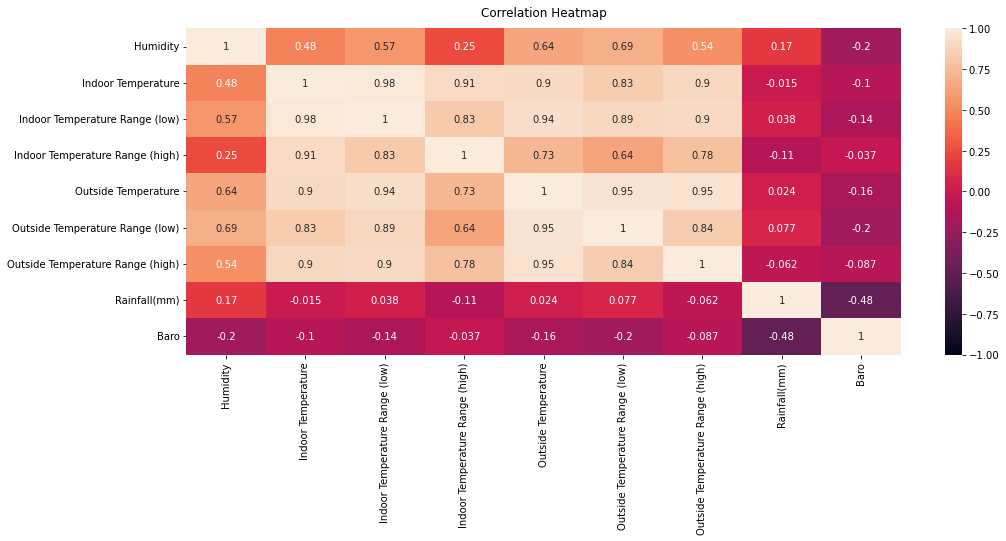

In [6]:
#Shows Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))    
heatmap = sns.heatmap(joined_dataframes.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12},pad=12);

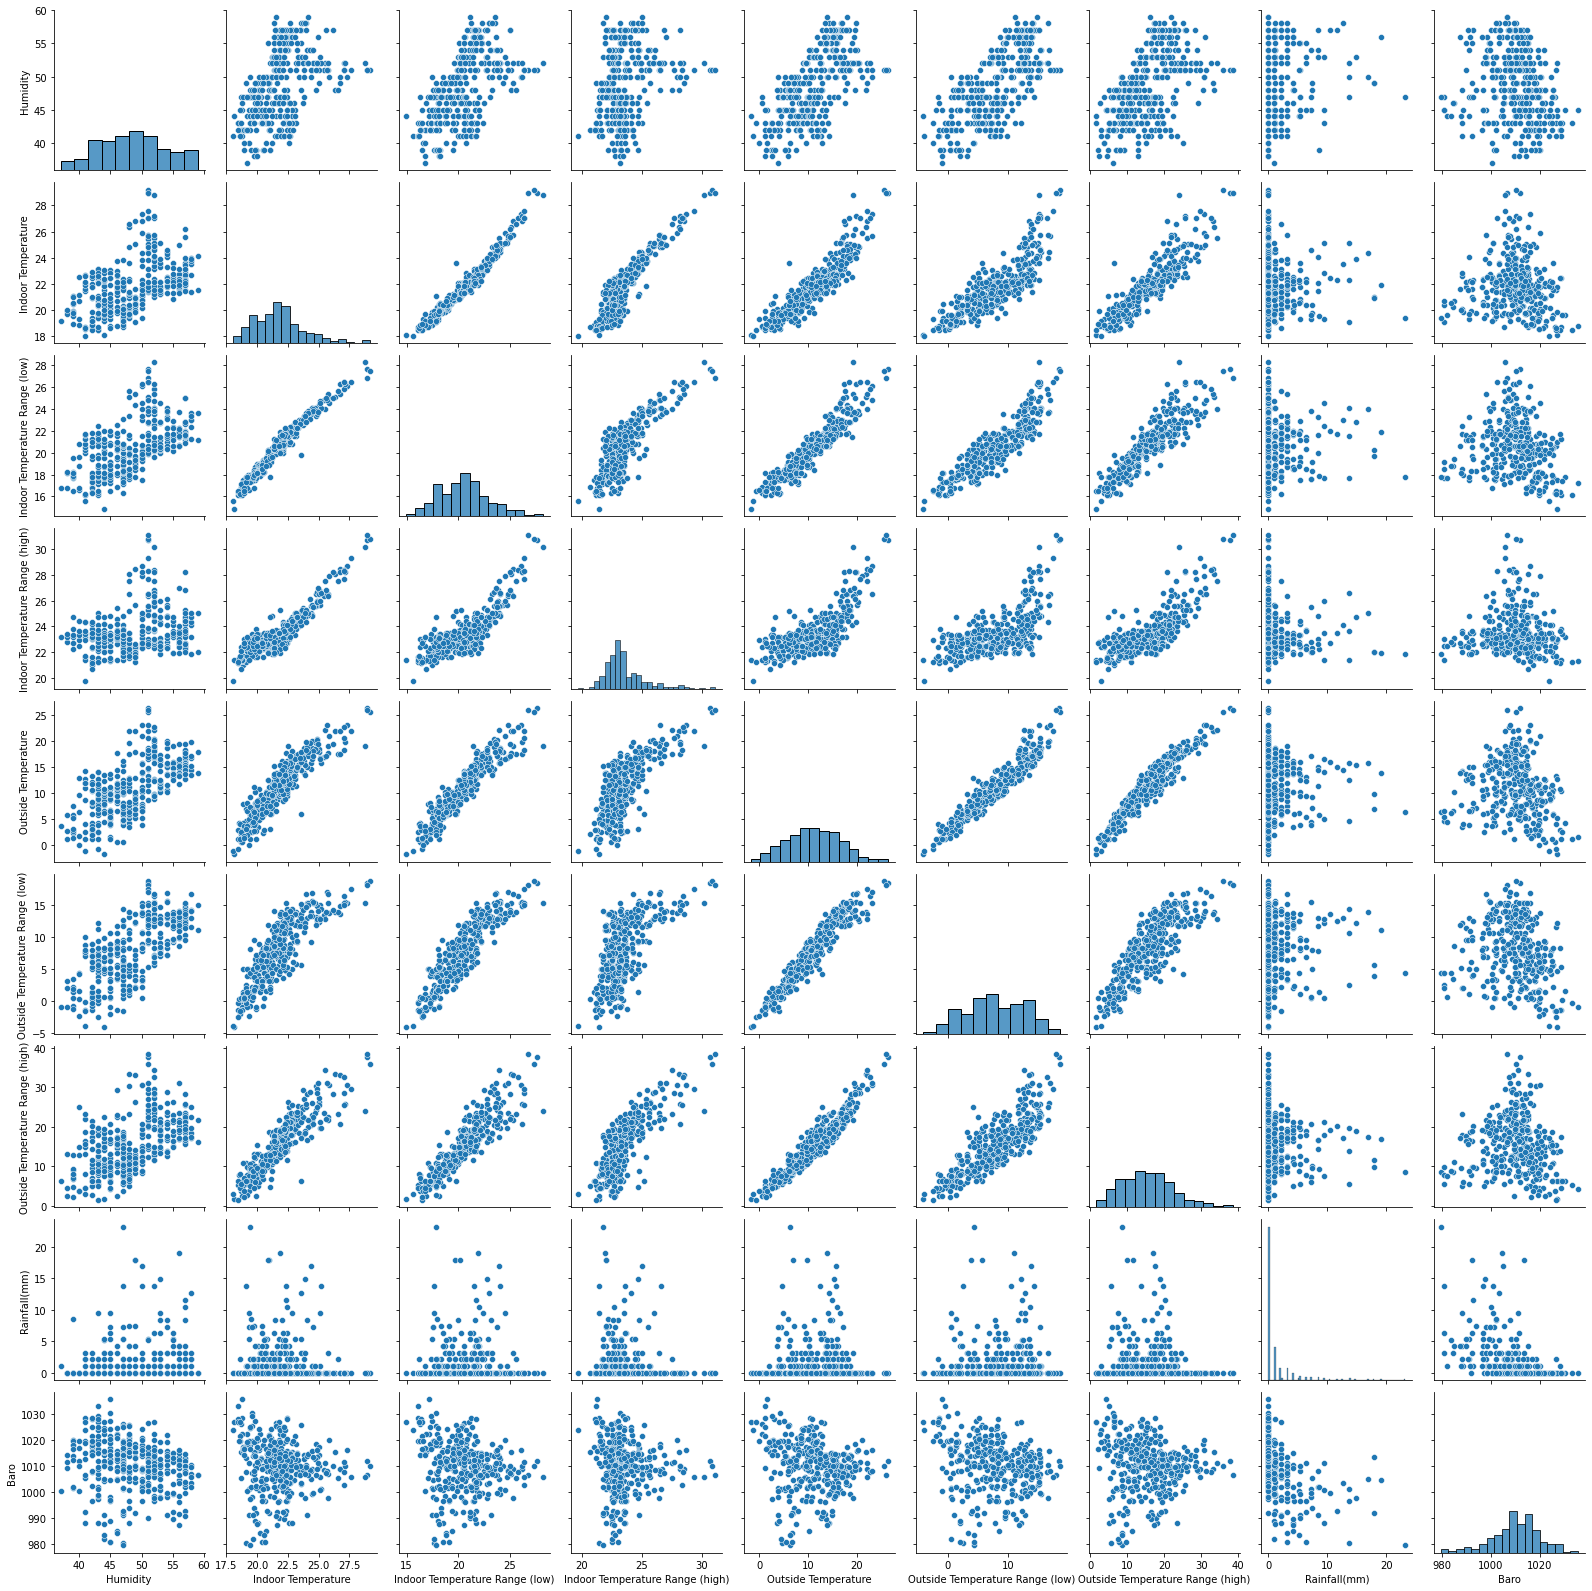

In [7]:
#Shows Pair Plots
sns.pairplot(joined_dataframes)

In [8]:
#Adding Month and Year to DataFrame
joined_dataframes['DateTime'] = pd.to_datetime(joined_dataframes['DateTime'])
joined_dataframes['Year'] = joined_dataframes['DateTime'].dt.year
joined_dataframes['Month'] = joined_dataframes['DateTime'].dt.month


print(joined_dataframes)


      DateTime  Humidity  Indoor Temperature  Indoor Temperature Range (low)  \
0   2016-10-09      54.0            21.93000                            21.0   
1   2016-10-10      52.0            21.77000                            20.4   
2   2016-10-11      51.0            21.36000                            19.9   
3   2016-10-12      51.0            21.44000                            20.0   
4   2016-10-13      52.0            21.22000                            20.1   
..         ...       ...                 ...                             ...   
350 2017-10-06      54.0            21.34000                            20.3   
351 2017-10-07      55.0            21.34000                            20.6   
352 2017-10-08      55.0            21.81000                            20.6   
353 2017-10-09      54.0            22.23125                            22.2   
354 2017-07-22       NaN                 NaN                             NaN   

     Indoor Temperature Range (high)  O

In [9]:
#Converting DataFrame to CSV file
pd.DataFrame.to_csv(joined_dataframes, 'joined_dataframes.csv', sep=',', na_rep='.', index=False)

AxesSubplot(0.125,0.125;0.775x0.755)


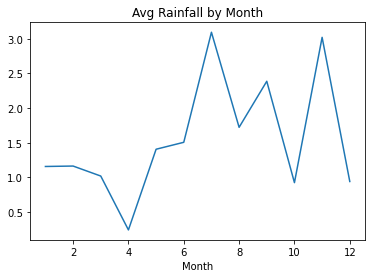

In [19]:
print(joined_dataframes.groupby('Month')['Rainfall(mm)'].mean().plot.line(x='month', y='Indoor Temperature', title='Avg Rainfall by Month'))


In [28]:
print(joined_dataframes.columns)

Index(['DateTime', 'Humidity', 'Indoor Temperature',
       'Indoor Temperature Range (low)', 'Indoor Temperature Range (high)',
       'Outside Temperature', 'Outside Temperature Range (low)',
       'Outside Temperature Range (high)', 'Rainfall(mm)', 'Baro', 'Year',
       'Month'],
      dtype='object')


AxesSubplot(0.125,0.125;0.775x0.755)


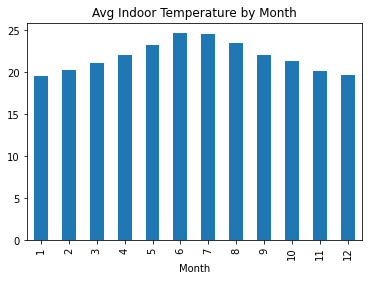

In [24]:
print(joined_dataframes.groupby('Month')['Indoor Temperature'].mean().plot.bar(x='month', y='Indoor Temperature', title='Avg Indoor Temperature by Month'))


AxesSubplot(0.125,0.125;0.775x0.755)


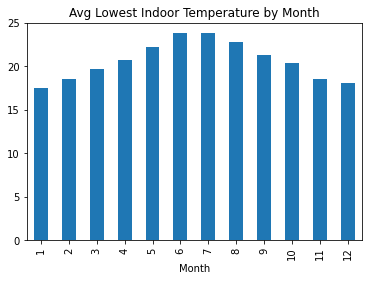

In [29]:
print(joined_dataframes.groupby('Month')['Indoor Temperature Range (low)'].mean().plot.bar(title='Avg Lowest Indoor Temperature by Month'))


AxesSubplot(0.125,0.125;0.775x0.755)


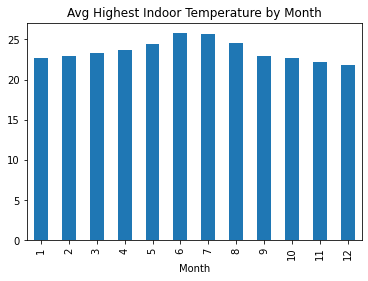

In [31]:
print(joined_dataframes.groupby('Month')['Indoor Temperature Range (high)'].mean().plot.bar(title='Avg Highest Indoor Temperature by Month'))
